In [1]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
import librosa
audio_path = 'download.wav'
x , sr = librosa.load(audio_path)

In [8]:
import IPython.display as ipd
ipd.Audio(audio_path)


You can even use an mp3 or a WMA format for the audio example.

## Visualizing Audio ##

*Waveform*

We can plot the audio array using librosa.display.waveplot:

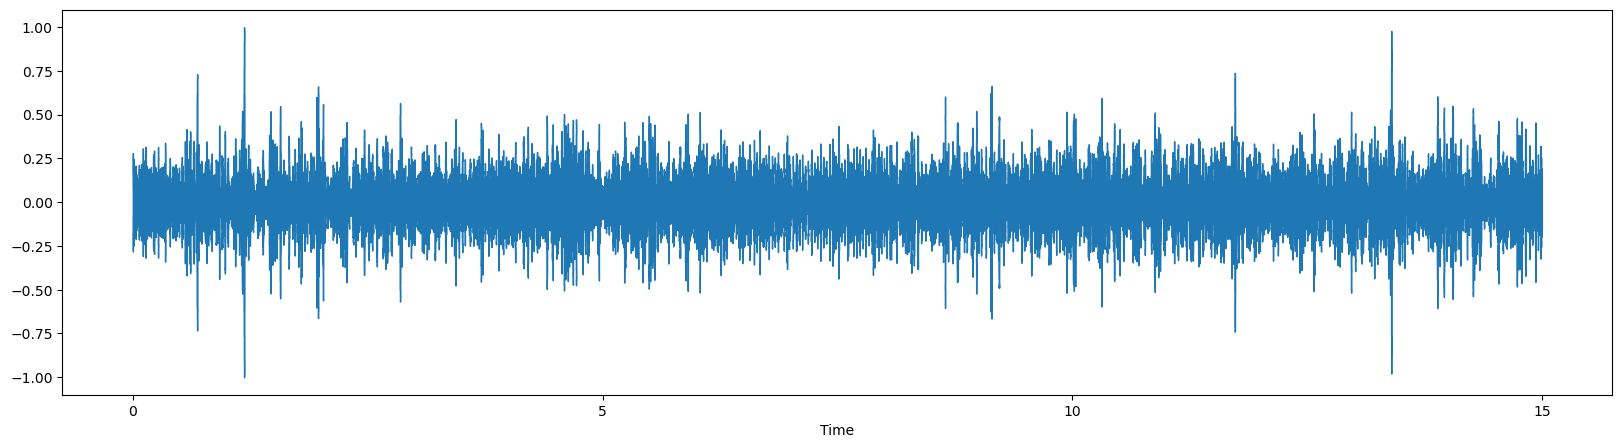

In [42]:
%matplotlib inline
import sklearn.preprocessing
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

* Spectrogram *
We can also display a spectrogram using librosa.display.specshow.

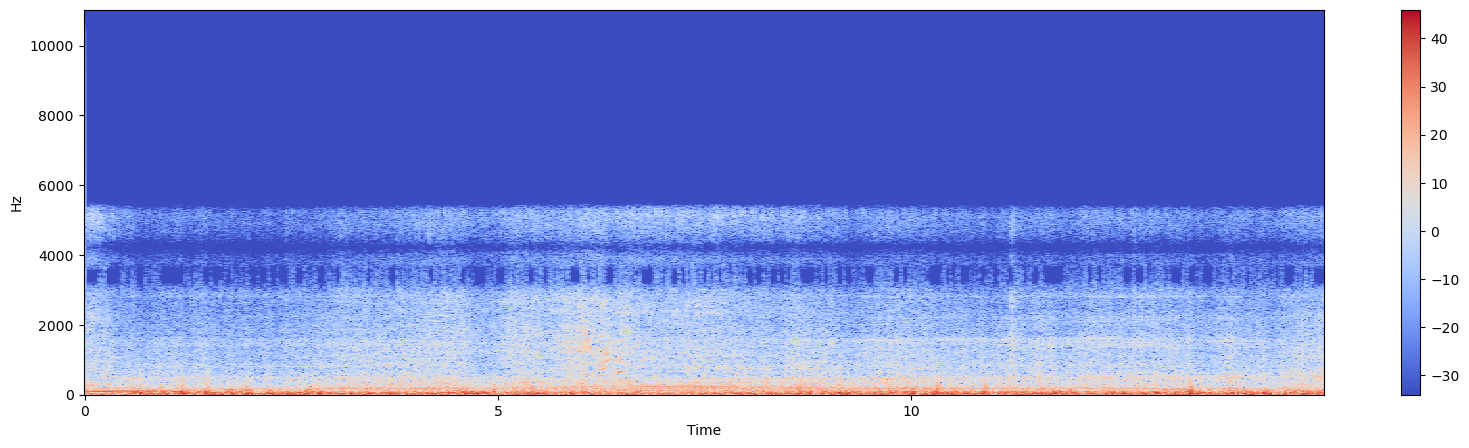

In [43]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Log Frequency axis


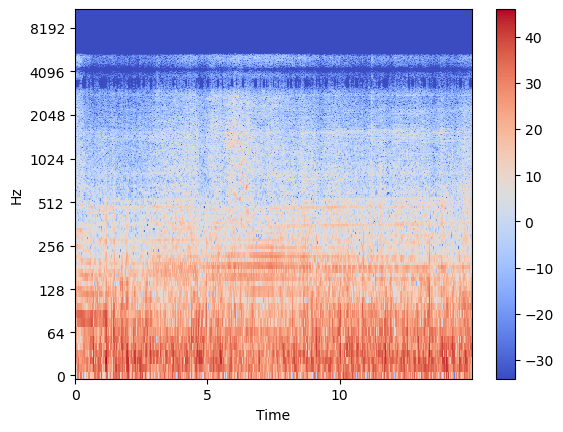

In [44]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


# Creating an audio signal#
Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.

In [45]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

Playing the sound

In [46]:
ipd.Audio(x, rate=sr) # load a NumPy array


# Saving the signal


In [47]:
from scipy.io import wavfile

wavfile.write('download.wav',sr, x) # writing wave file in tone440.wav format


In [48]:
x, sr = librosa.load('downloa.wav')
ipd.Audio(x, rate=sr)


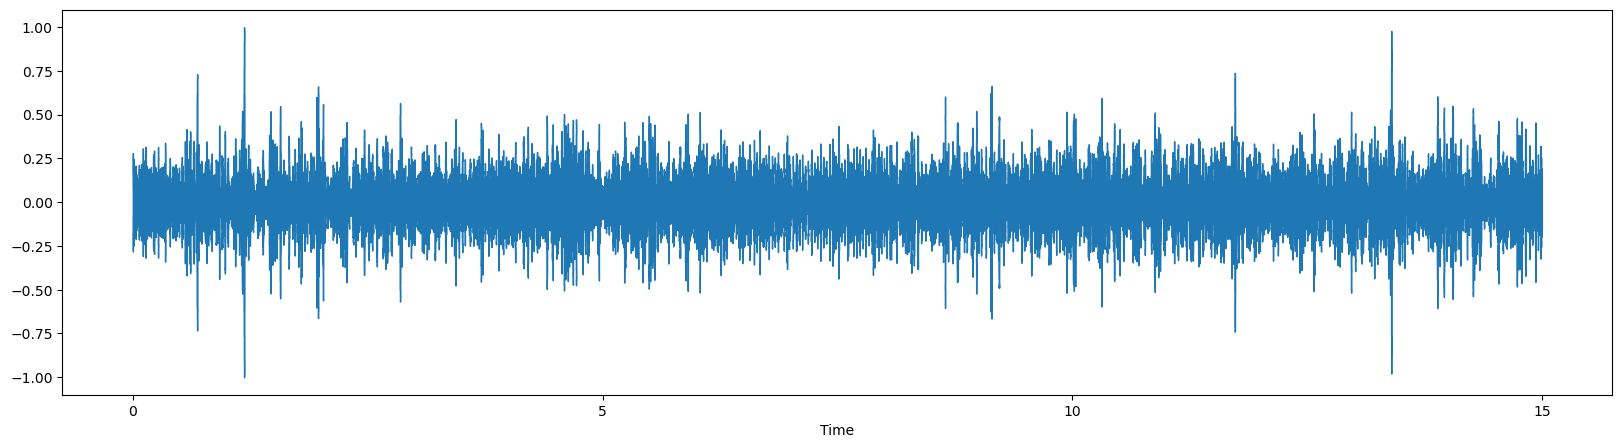

In [49]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)


# 1. Zero Crossing Rate


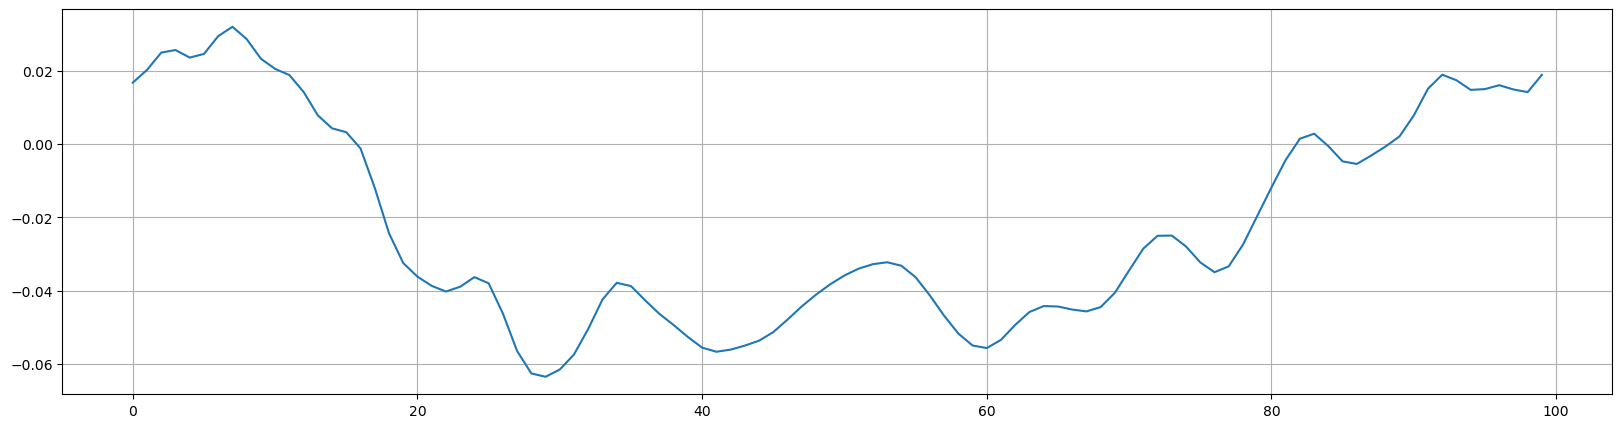

In [50]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [51]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape


(100,)

In [52]:
print(sum(zero_crossings))


4


# 2.Spectral Centroid


In [54]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape


(646,)

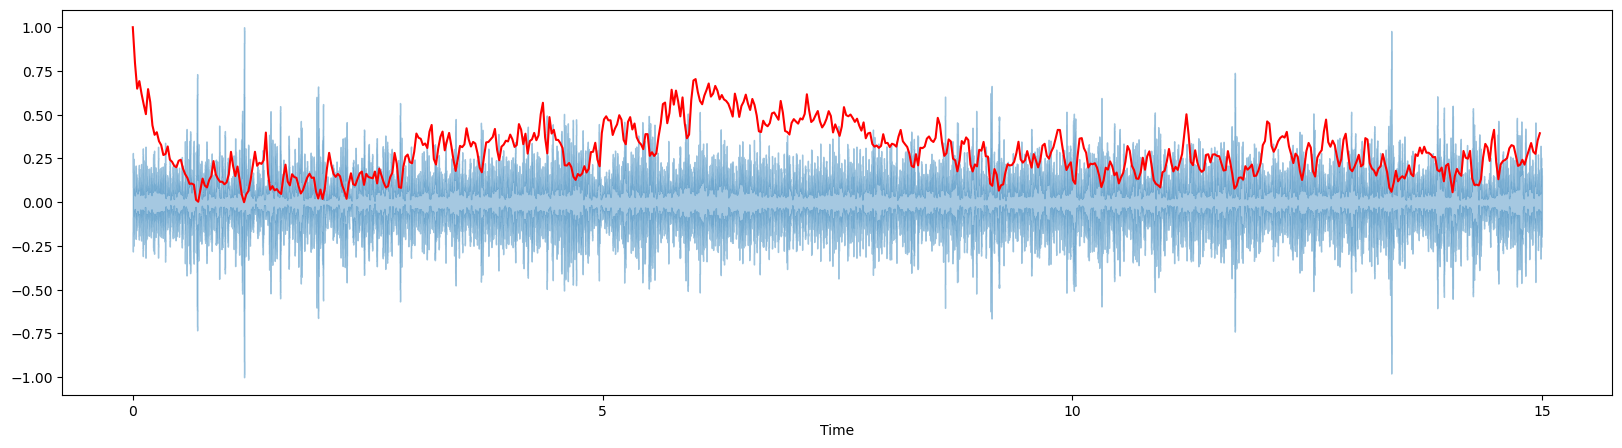

In [58]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y=x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


# 3.Spectral Rolloff


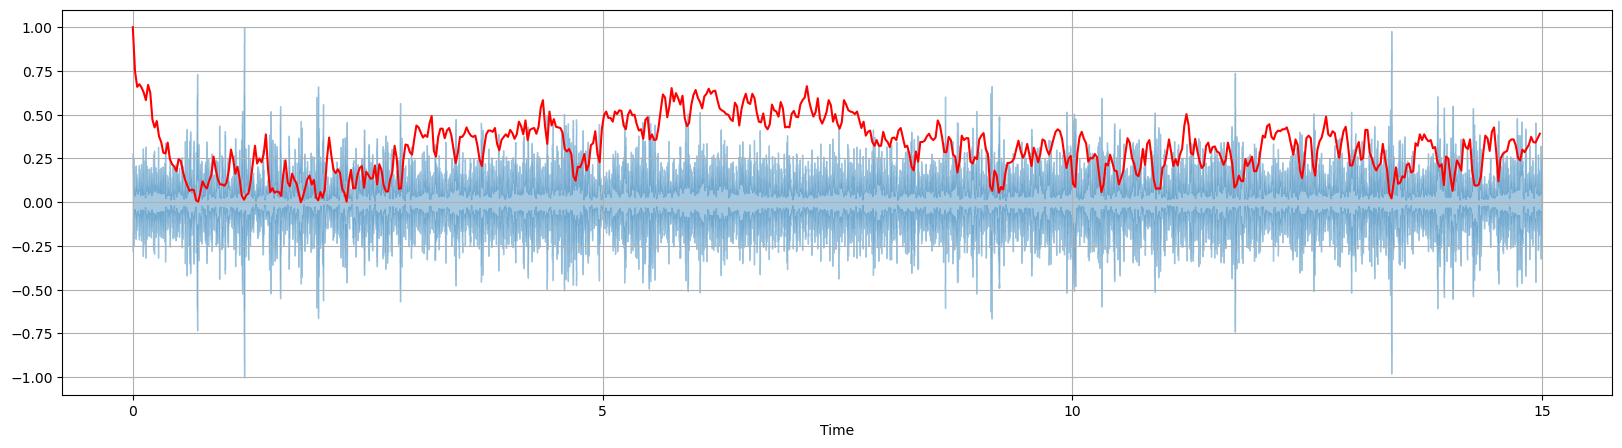

In [61]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()


# 4.MFCC

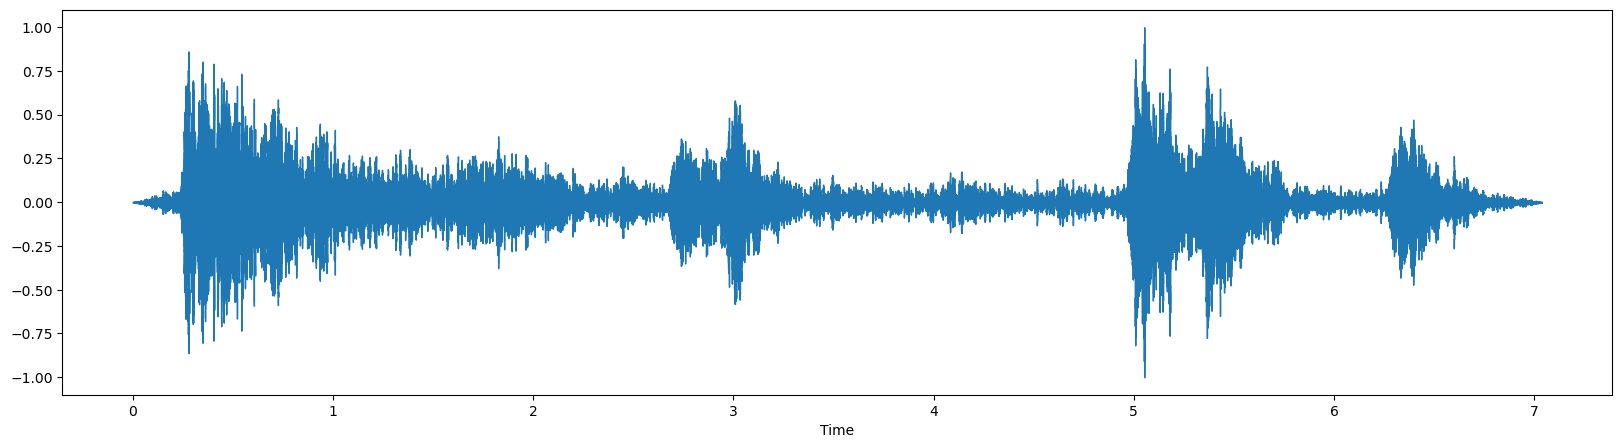

In [66]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('downlo.wav')
librosa.display.waveshow(x, sr=sr)


(20, 304)


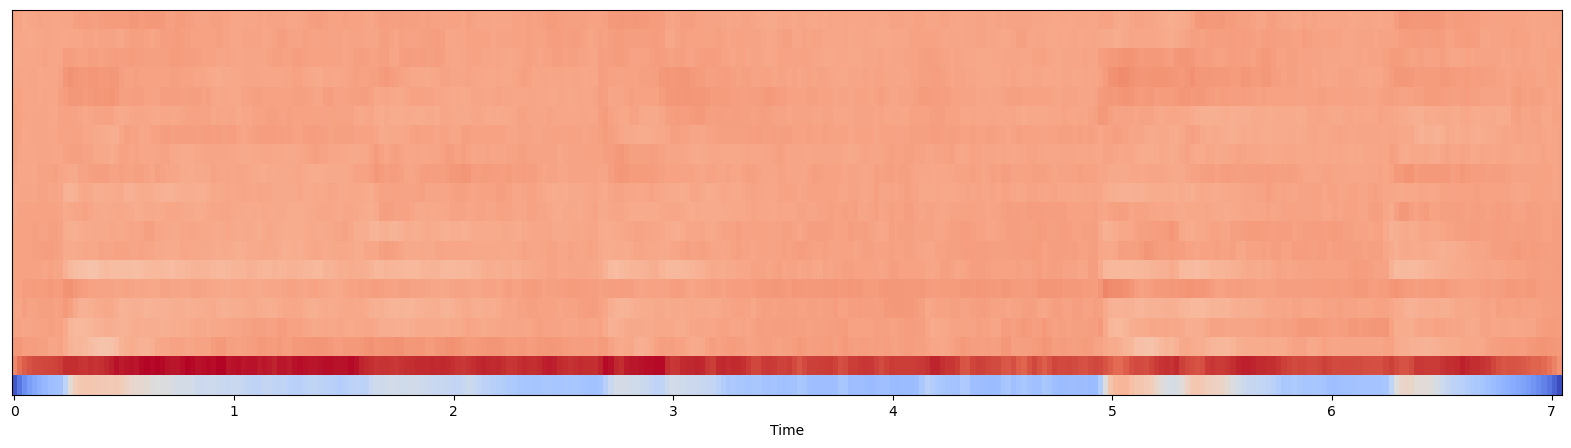

In [68]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [70]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.2548346e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.5096693e-08  0.0000000e+00  1.2548346e-08  0.0000000e+00
  1.2548346e-08 -1.2548346e-08  1.2548346e-08  3.1370866e-09
 -6.2741732e-09  0.0000000e+00 -1.2548346e-08  0.0000000e+00]
[1.        1.        1.        1.        1.0000001 1.        0.9999999
 1.        1.        0.9999999 1.        0.9999999 1.        1.
 1.        1.0000001 1.0000001 1.0000001 0.9999999 1.       ]


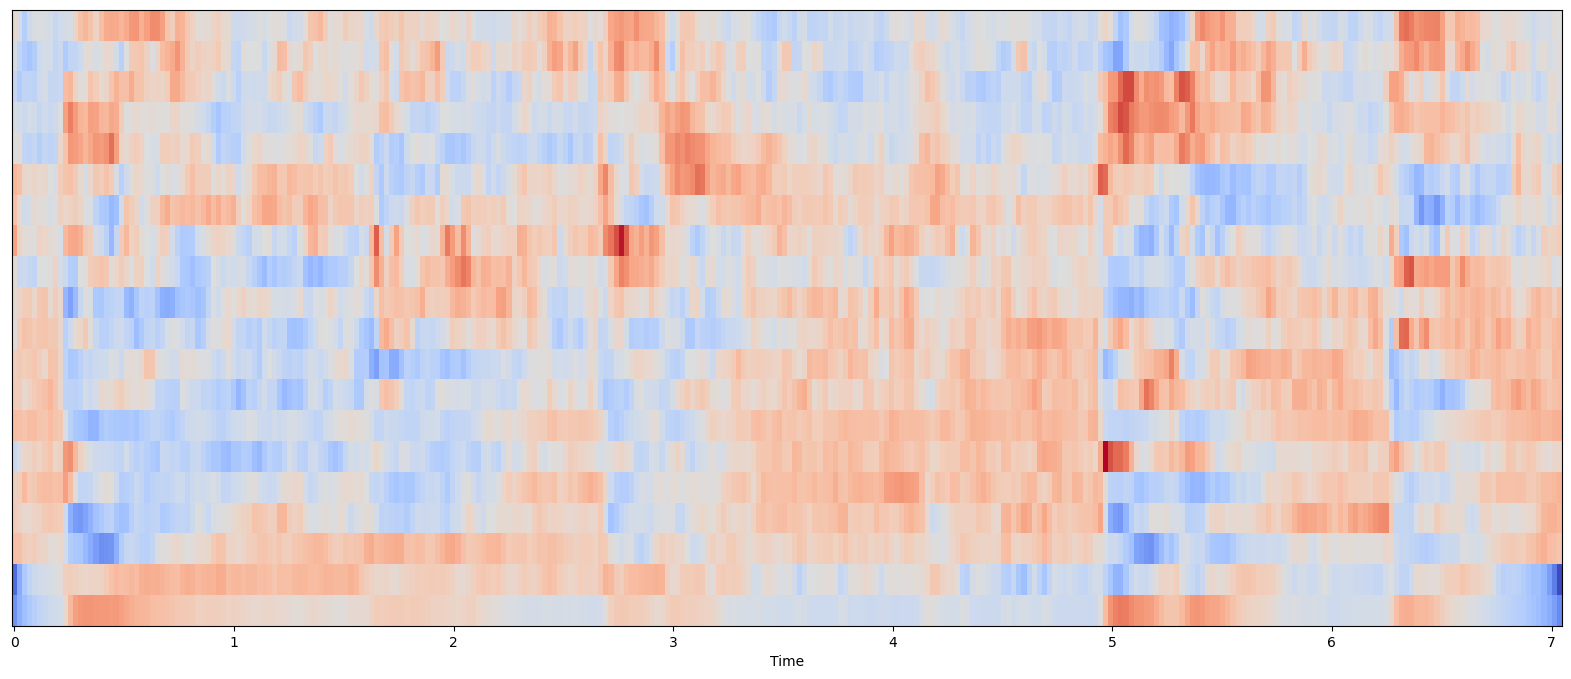

In [71]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [73]:
# Loadign the file
x, sr = librosa.load('downlo.wav')
ipd.Audio(x, rate=sr)


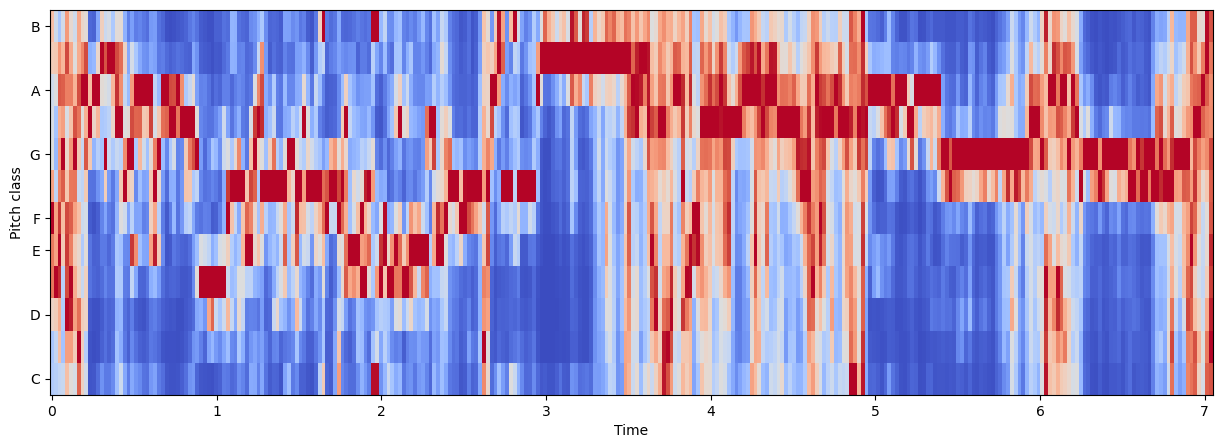

In [75]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
